In [138]:
import numpy as np
import pandas as pd

In [ ]:
# teste do exercício do alura
# atletas = pd.DataFrame([['Marcos', 9.62,1], ['Pedro', None,1], ['João', 9.69,1], 
#                         ['Beto', 9.72,1], ['Sandro', None,1], ['Denis', 9.69,None], 
#                         ['Ary', None,None], ['Carlos', 9.74,None]], 
#                         columns = ['Corredor', 'Melhor Tempo','teste'])

# atletas["Melhor Tempo"].fillna(atletas["Melhor Tempo"].mean(), inplace = True)
# atletas

In [139]:
#Importando dados
dados=pd.read_csv(filepath_or_buffer='clientes.csv', sep=';')

#Quantidade de linhas
dados.shape[0]
#len(dados)

10000

In [140]:
dados['Sinistros'].fillna(0,inplace=True)
dados

,Id,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria,Desconto
0,1,64,M,viuvo,0.0,774.464232,Sênior,697.017809
1,2,34,F,divorciado,7.0,1411.800897,Adulto,1411.800897
2,3,84,F,divorciado,2.0,803.922742,Sênior,803.922742
3,4,42,F,casado,2.0,1142.005576,Adulto,1142.005576
4,5,20,M,casado,0.0,940.051137,Jovem,940.051137
...,...,...,...,...,...,...,...,...
9995,9996,79,F,casado,0.0,975.383433,Sênior,975.383433
9996,9997,65,F,divorciado,0.0,1143.553683,Sênior,1029.198314
9997,9998,18,M,casado,1.0,1028.185036,Jovem,1028.185036
9998,9999,104,F,viuvo,2.0,813.078427,Sênior,813.078427


In [141]:
dados[['Prêmio','Desconto']]=dados[['Prêmio','Desconto']].round(2)
#dados=dados.round({'Prêmio':2,"Desconto":2})
dados

,Id,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria,Desconto
0,1,64,M,viuvo,0.0,774.46,Sênior,697.02
1,2,34,F,divorciado,7.0,1411.80,Adulto,1411.80
2,3,84,F,divorciado,2.0,803.92,Sênior,803.92
3,4,42,F,casado,2.0,1142.01,Adulto,1142.01
4,5,20,M,casado,0.0,940.05,Jovem,940.05
...,...,...,...,...,...,...,...,...
9995,9996,79,F,casado,0.0,975.38,Sênior,975.38
9996,9997,65,F,divorciado,0.0,1143.55,Sênior,1029.20
9997,9998,18,M,casado,1.0,1028.19,Jovem,1028.19
9998,9999,104,F,viuvo,2.0,813.08,Sênior,813.08


In [ ]:
# dados.pop('Desconto')
# del dados['Desconto']
dados.drop(['Desconto'],axis=1,inplace=True)
dados

In [33]:
dados.sort_values(by=['Idade'], inplace=True)

In [147]:
resumo = dados.groupby(by='Sexo')
resumo = pd.DataFrame(resumo['Prêmio'].mean().round(2))
resumo.reset_index()


,Sexo,Prêmio
0,F,1003.48
1,M,994.84


In [161]:
resumo2=dados.groupby(by='Categoria')
resumo2=pd.DataFrame(resumo2['Categoria'].count())
resumo2.rename(columns={'Categoria':'Contagem'},inplace=True)
resumo2.reset_index(inplace=True)
# resumo2.index.name=None
# resumo2.columns.name='Categoria'
resumo2.sort_values(by='Contagem',inplace=True)
resumo2

,Categoria,Contagem
1,Jovem,1412
0,Adulto,1602
2,Sênior,6986


In [133]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

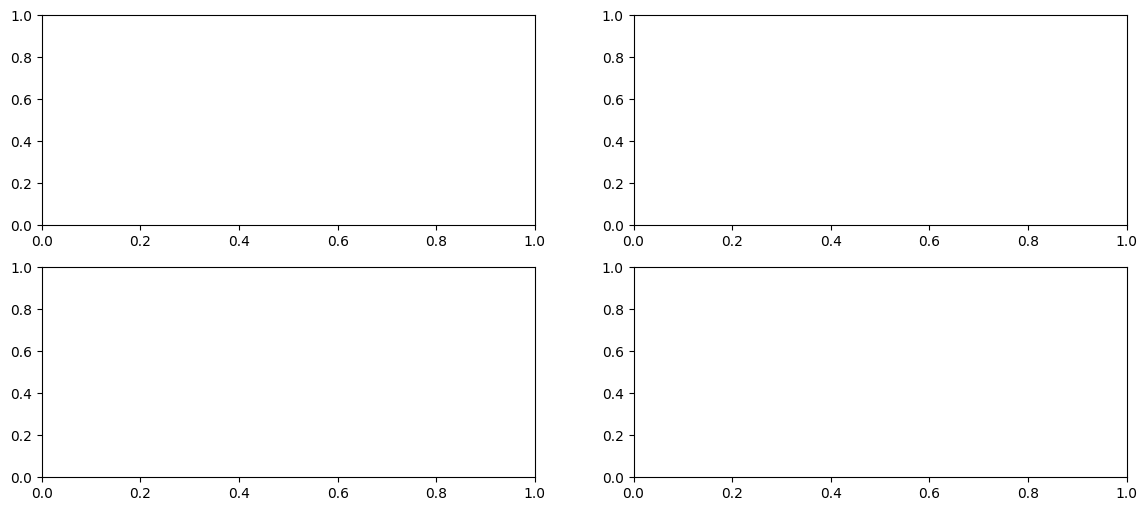

In [187]:
area = plt.figure() 
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
#g3 = area.add_subplot(2, 1, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

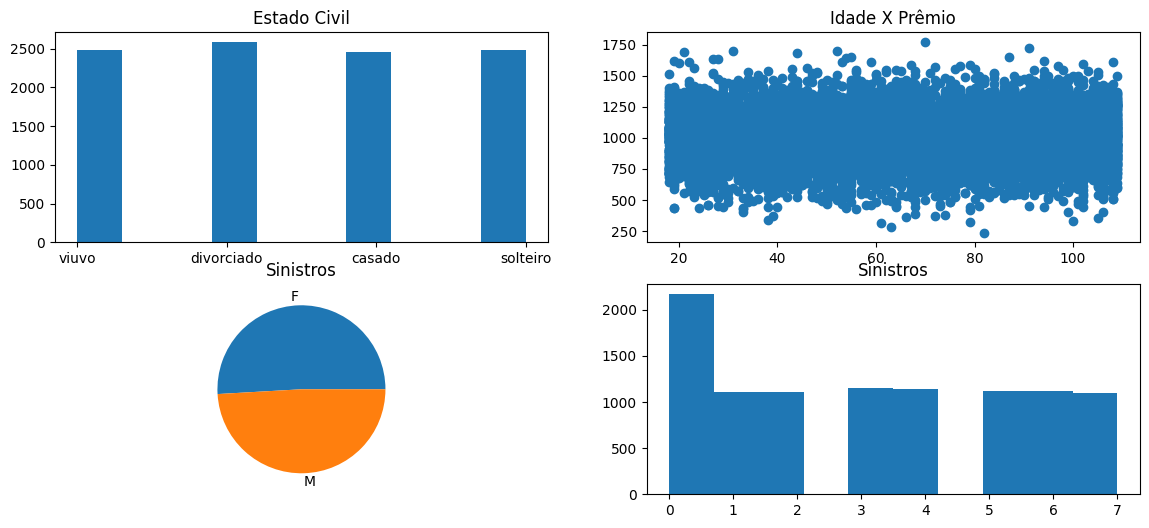

In [188]:
g1.hist(dados['Estado Civil'])
g1.set_title('Estado Civil')
g2.scatter(dados.Idade, dados.Prêmio)
g2.set_title('Idade X Prêmio')
base_g3 = dados.groupby(by='Sexo')
base_g3 = pd.DataFrame(base_g3['Sinistros'].sum().round(2))
base_g3.reset_index(inplace=True)
g3.pie(base_g3.Sinistros,labels=base_g3['Sexo'])
g3.set_title('Sinistros')
g4.hist(dados['Sinistros'])
g4.set_title('Sinistros')
area